<a href="https://colab.research.google.com/github/RifatMuhtasim/R_Programming_Language/blob/main/1.07.Proportion_Chi_Squared_and_Fisher's_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proportion Test

In [1]:
## Single/Assign Population Proportion Test
prop.test(x=15, n=32) # p = NULL (Compare with p = 0.5)

# P value is grater than 0.05 we can't reject the null hypothesis


	1-sample proportions test with continuity correction

data:  15 out of 32, null probability 0.5
X-squared = 0.03125, df = 1, p-value = 0.8597
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.2951014 0.6496695
sample estimates:
      p 
0.46875 


In [2]:
# Compare with p = 0.7
prop.test(x=15, n =32, p = 0.7)

# P value is less than the 0.05 we reject the null hypothesis


	1-sample proportions test with continuity correction

data:  15 out of 32, null probability 0.7
X-squared = 7.0848, df = 1, p-value = 0.007774
alternative hypothesis: true p is not equal to 0.7
95 percent confidence interval:
 0.2951014 0.6496695
sample estimates:
      p 
0.46875 


In [3]:
## Comparison of Two Population Proportions
# install.packages('MASS')
library(MASS)
head(quine)

,Eth,Sex,Age,Lrn,Days
,<fct>,<fct>,<fct>,<fct>,<int>
1,A,M,F0,SL,2
2,A,M,F0,SL,11
3,A,M,F0,SL,14
4,A,M,F0,AL,5
5,A,M,F0,AL,5
6,A,M,F0,AL,13


In [4]:
unique(quine$Eth)
unique(quine$Sex)
table(quine$Eth, quine$Sex) # Eth: Ethnicity- 2 levels A= aboriginal, N = not

[1] A N
Levels: A N

[1] M F
Levels: F M

   
     F  M
  A 38 31
  N 42 35

In [5]:
# 2-sample test for equality of proportions without continuity correction
prop.test(table(quine$Eth, quine$Sex), correct = FALSE)


	2-sample test for equality of proportions without continuity correction

data:  table(quine$Eth, quine$Sex)
X-squared = 0.0040803, df = 1, p-value = 0.9491
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1564218  0.1669620
sample estimates:
   prop 1    prop 2 
0.5507246 0.5454545 


# Chi-Squared Test


In [6]:
#Read Car Auction Data
cars <- read.csv("https://biostat.jhsph.edu/~ajaffe/files/kaggleCarAuction.csv", as.is=TRUE)
head(cars)
dim(cars)
names(cars)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,⋯,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>
1,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,⋯,11597,12409,NULL,NULL,21973,33619,FL,7100,0,1113
2,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,⋯,11374,12791,NULL,NULL,19638,33619,FL,7600,0,1053
3,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,⋯,7146,8702,NULL,NULL,19638,33619,FL,4900,0,1389
4,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,⋯,4375,5518,NULL,NULL,19638,33619,FL,4100,0,630
5,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,⋯,6739,7911,NULL,NULL,19638,33619,FL,4000,0,1020
6,6,0,12/7/2009,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,⋯,8149,9451,NULL,NULL,19638,33619,FL,5600,0,594


[1] 72983    34

[1] "RefId"                             "IsBadBuy"                         
 [3] "PurchDate"                         "Auction"                          
 [5] "VehYear"                           "VehicleAge"                       
 [7] "Make"                              "Model"                            
 [9] "Trim"                              "SubModel"                         
[11] "Color"                             "Transmission"                     
[13] "WheelTypeID"                       "WheelType"                        
[15] "VehOdo"                            "Nationality"                      
[17] "Size"                              "TopThreeAmericanName"             
[19] "MMRAcquisitionAuctionAveragePrice" "MMRAcquisitionAuctionCleanPrice"  
[21] "MMRAcquisitionRetailAveragePrice"  "MMRAcquisitonRetailCleanPrice"    
[23] "MMRCurrentAuctionAveragePrice"     "MMRCurrentAuctionCleanPrice"      
[25] "MMRCurrentRetailAveragePrice"      "MMRCurrentRetailCleanPrice"       
[27] "PRIMEUNIT"                         "AUCGUART"                         
[29] "BYRNO"                             "VNZIP1"                           
[31] "VNST"                              "VehBCost"                         
[33] "IsOnlineSale"                      "WarrantyCost"

In [7]:
tab <- table(cars$IsBadBuy, cars$IsOnlineSale)
tab

   
        0     1
  0 62375  1632
  1  8763   213

In [8]:
# Chi-squared tests
chq <- chisq.test(tab)
chq


	Pearson's Chi-squared test with Yates' continuity correction

data:  tab
X-squared = 0.92735, df = 1, p-value = 0.3356


In [9]:
names(chq)
chq$p.value

[1] "statistic" "parameter" "p.value"   "method"    "data.name" "observed" 
[7] "expected"  "residuals" "stdres"

[1] 0.3355516

### Question:

- 356 People have been polled on their smoking status (Smoke) and their socioeconomic status (SES). For each person it was determined wheter or not they are current smokers, former smokers and have never smoked. Also for each person their socioeconomic status was determined (low, middle, high).

In [10]:
# Import the Smoking and SES data in R.
smoke <- matrix(c(51,22,43,92,21,28,68,9,22), ncol=3, byrow = TRUE)

colnames(smoke) <- c("High", "Middle", "Low")
rownames(smoke) <- c("Current", "Former", "Never")
smoke <- as.table(smoke)
smoke

        High Middle Low
Current   51     22  43
Former    92     21  28
Never     68      9  22

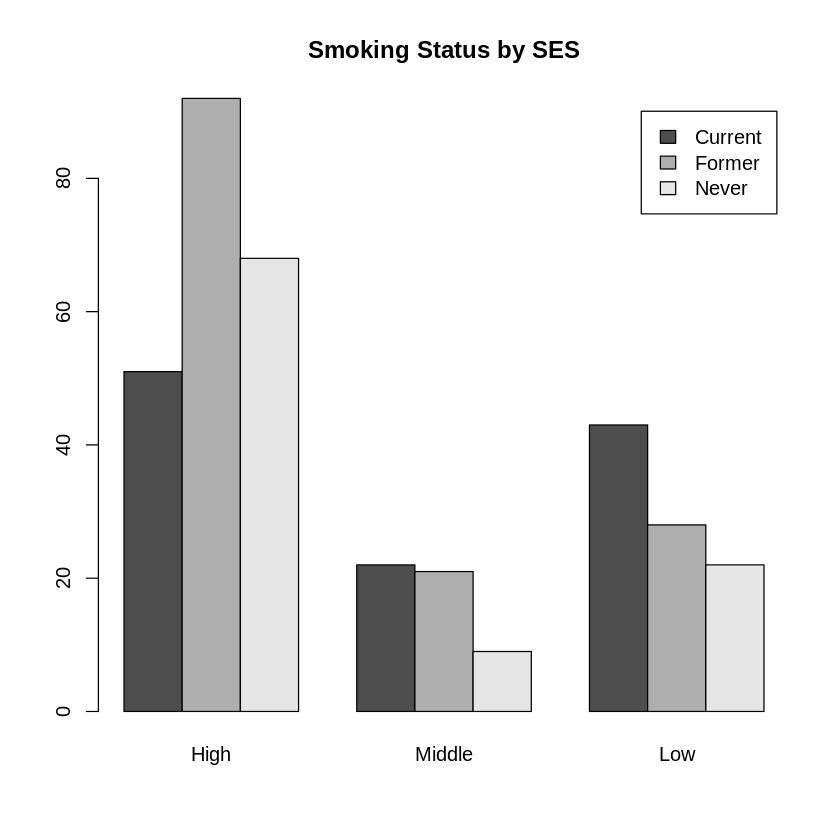

In [11]:
#Checking plot
barplot(smoke,legend=T,beside=T,main='Smoking Status by SES')

In [12]:
# Calculate the marginal distributions across the rows or columns
margin.table(smoke)

[1] 356

In [13]:
margin.table(smoke, 1)
margin.table(smoke, 2)

Current  Former   Never 
    116     141      99 

  High Middle    Low 
   211     52     93 

In [14]:
# To get the proportions using the prop.table command
prop.table(smoke)

              High     Middle        Low
Current 0.14325843 0.06179775 0.12078652
Former  0.25842697 0.05898876 0.07865169
Never   0.19101124 0.02528090 0.06179775

In [15]:
prop.table(smoke, 1)
prop.table(smoke, 2)

              High     Middle        Low
Current 0.43965517 0.18965517 0.37068966
Former  0.65248227 0.14893617 0.19858156
Never   0.68686869 0.09090909 0.22222222

             High    Middle       Low
Current 0.2417062 0.4230769 0.4623656
Former  0.4360190 0.4038462 0.3010753
Never   0.3222749 0.1730769 0.2365591

In [16]:
# To do a chi-squared test to determine if the proportions are different
summary(smoke)

Number of cases in table: 356 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 18.51, df = 4, p-value = 0.0009808

In [17]:
chisq.test(smoke)


	Pearson's Chi-squared test

data:  smoke
X-squared = 18.51, df = 4, p-value = 0.0009808


# Fisher's Exact Test

In [18]:
tab <- table(cars$IsBadBuy, cars$IsOnlineSale)
tab

   
        0     1
  0 62375  1632
  1  8763   213

In [19]:
fisher.test(tab)


	Fisher's Exact Test for Count Data

data:  tab
p-value = 0.3324
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8001727 1.0742114
sample estimates:
odds ratio 
 0.9289923 


In [20]:
# Agresti (1990, p. 61f; 2002, p. 91) Fisher's Tea Drinker example
TeaTest <- matrix(c(3, 1, 1, 3), nrow=2, dimnames = list(Guess = c("Milk", "Tea"), Truth = c("Milk", "Tea")))
TeaTest

,Milk,Tea
Milk,3,1
Tea,1,3


In [21]:
fisher.test(TeaTest)


	Fisher's Exact Test for Count Data

data:  TeaTest
p-value = 0.4857
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
   0.2117329 621.9337505
sample estimates:
odds ratio 
  6.408309 
